In [ ]:
!nvidia-smi

Mon Sep 22 13:30:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ak1LJJ6uIcgJMURbe5bs")
project = rf.workspace("syed-mahadhi-zs2u7").project("fire-8klur")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/fire-2'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolov8n.pt epochs=50 imgsz=640

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

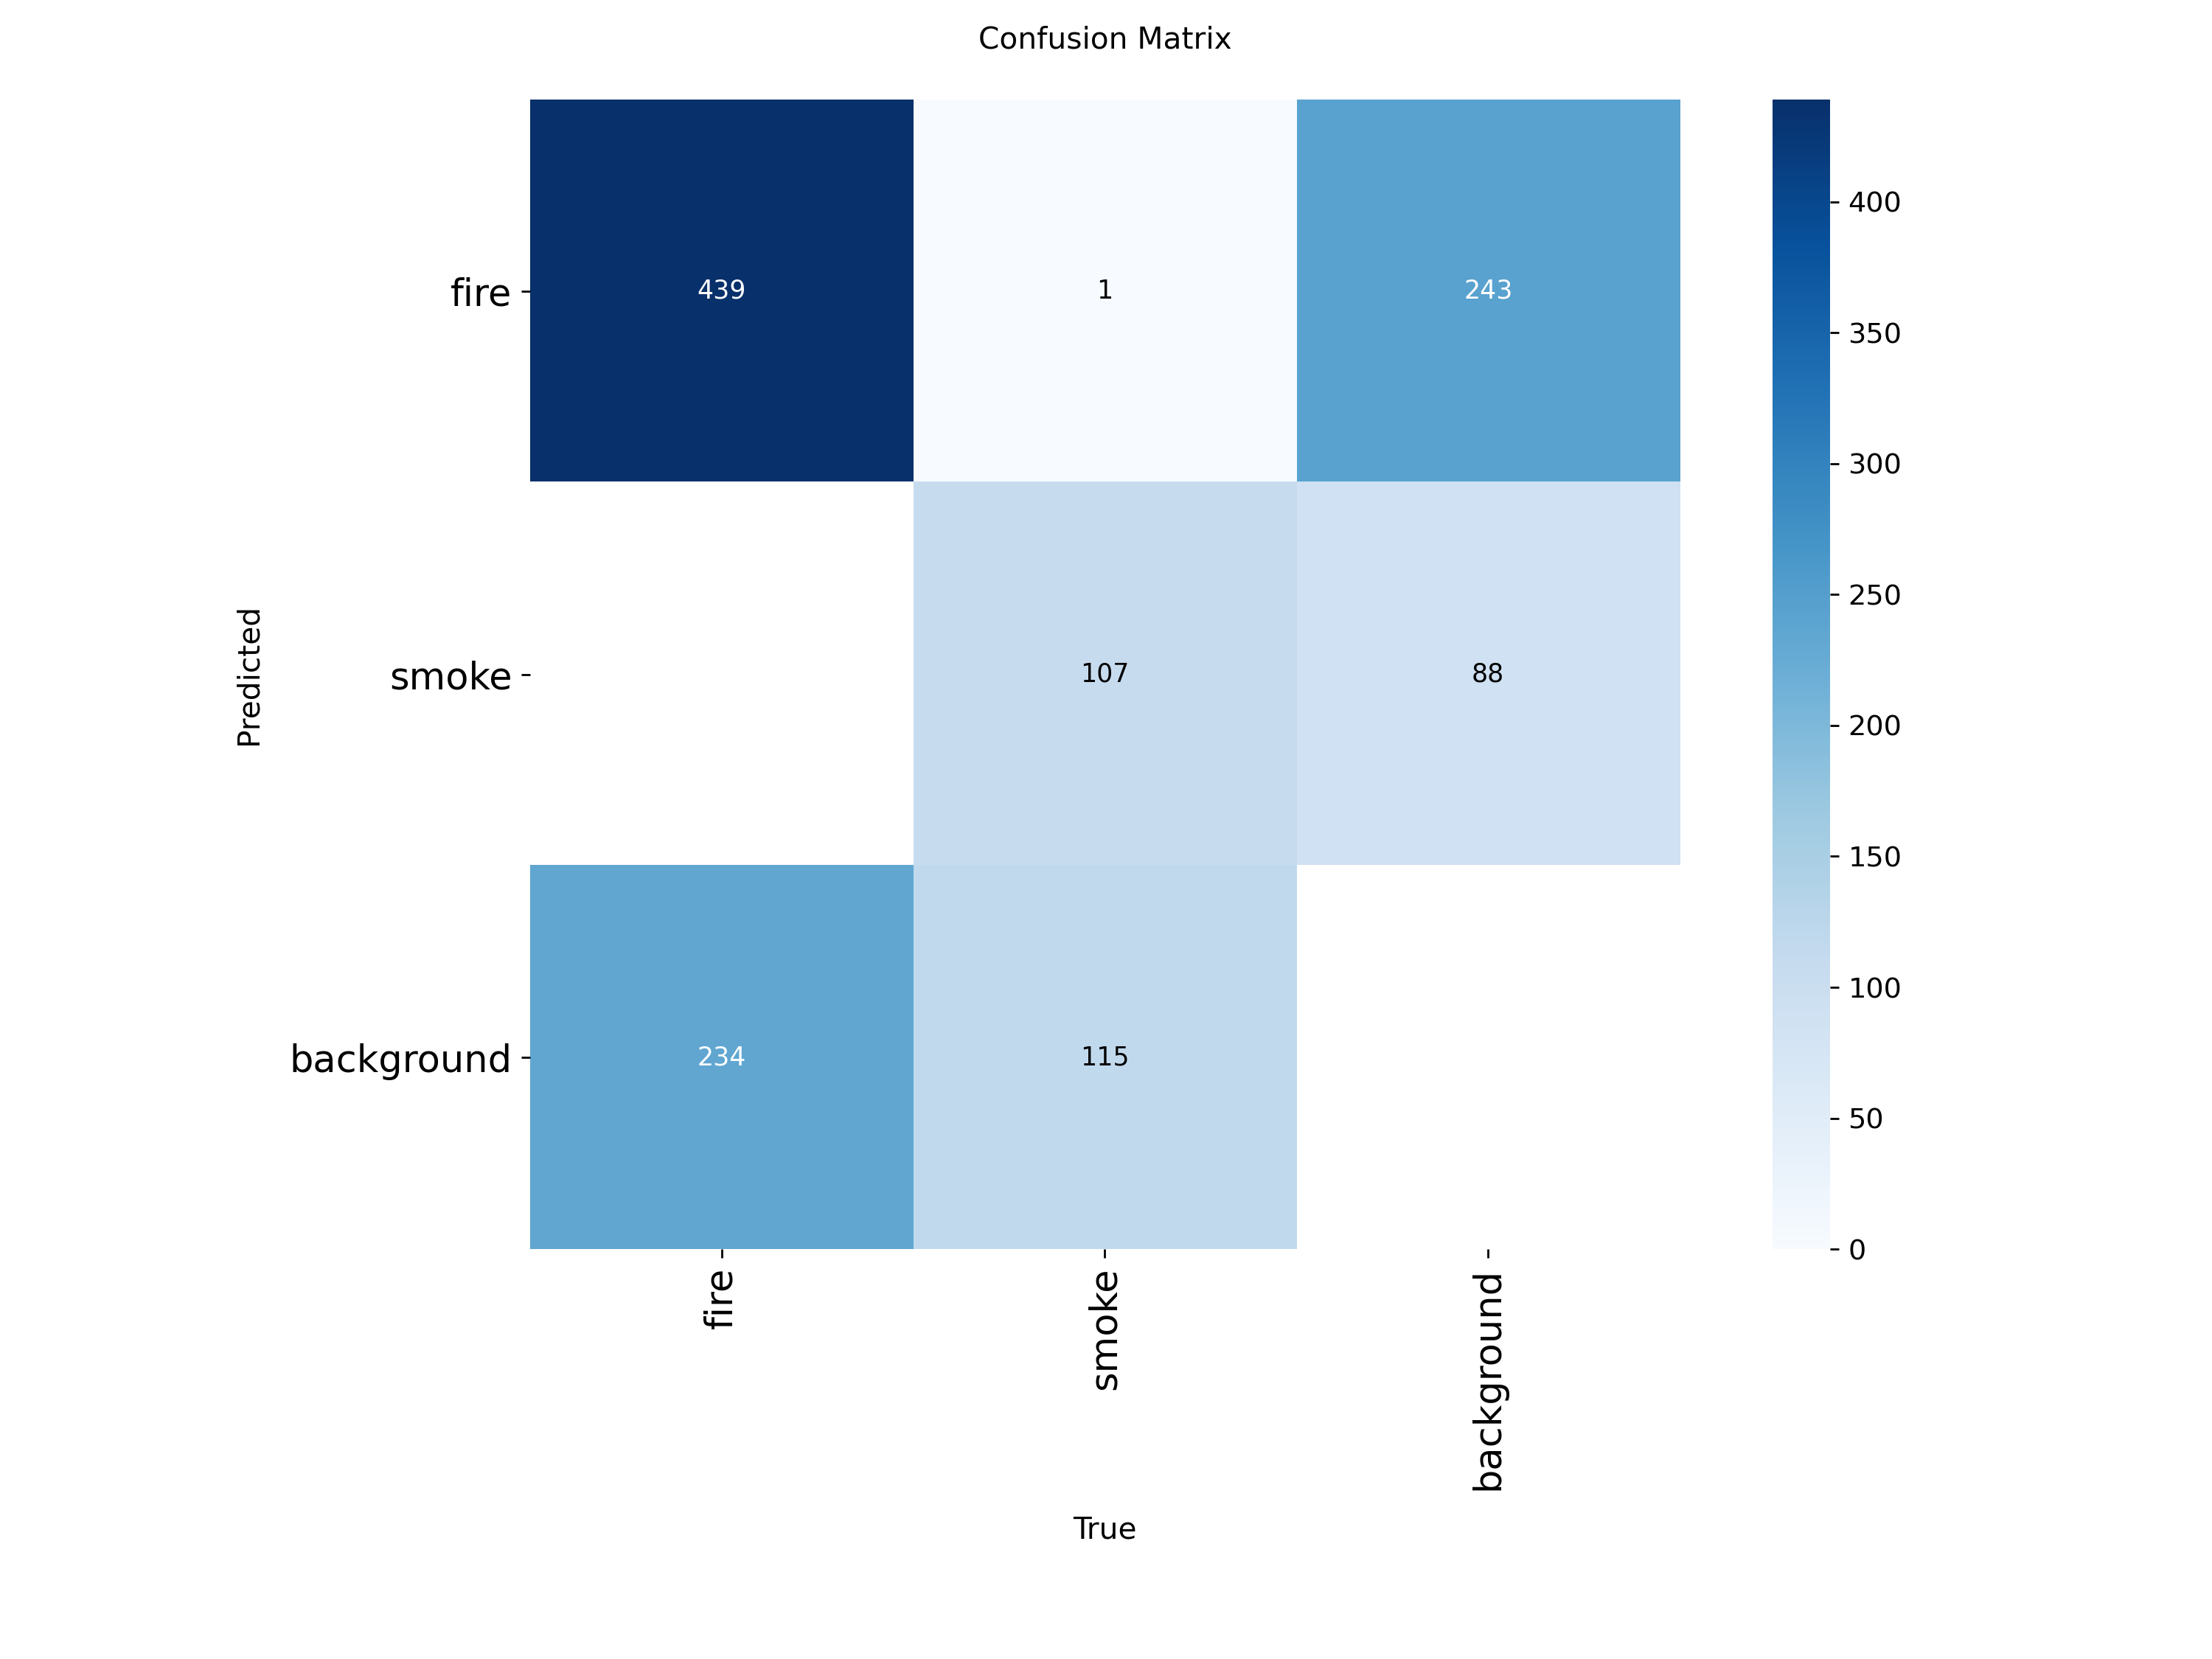

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

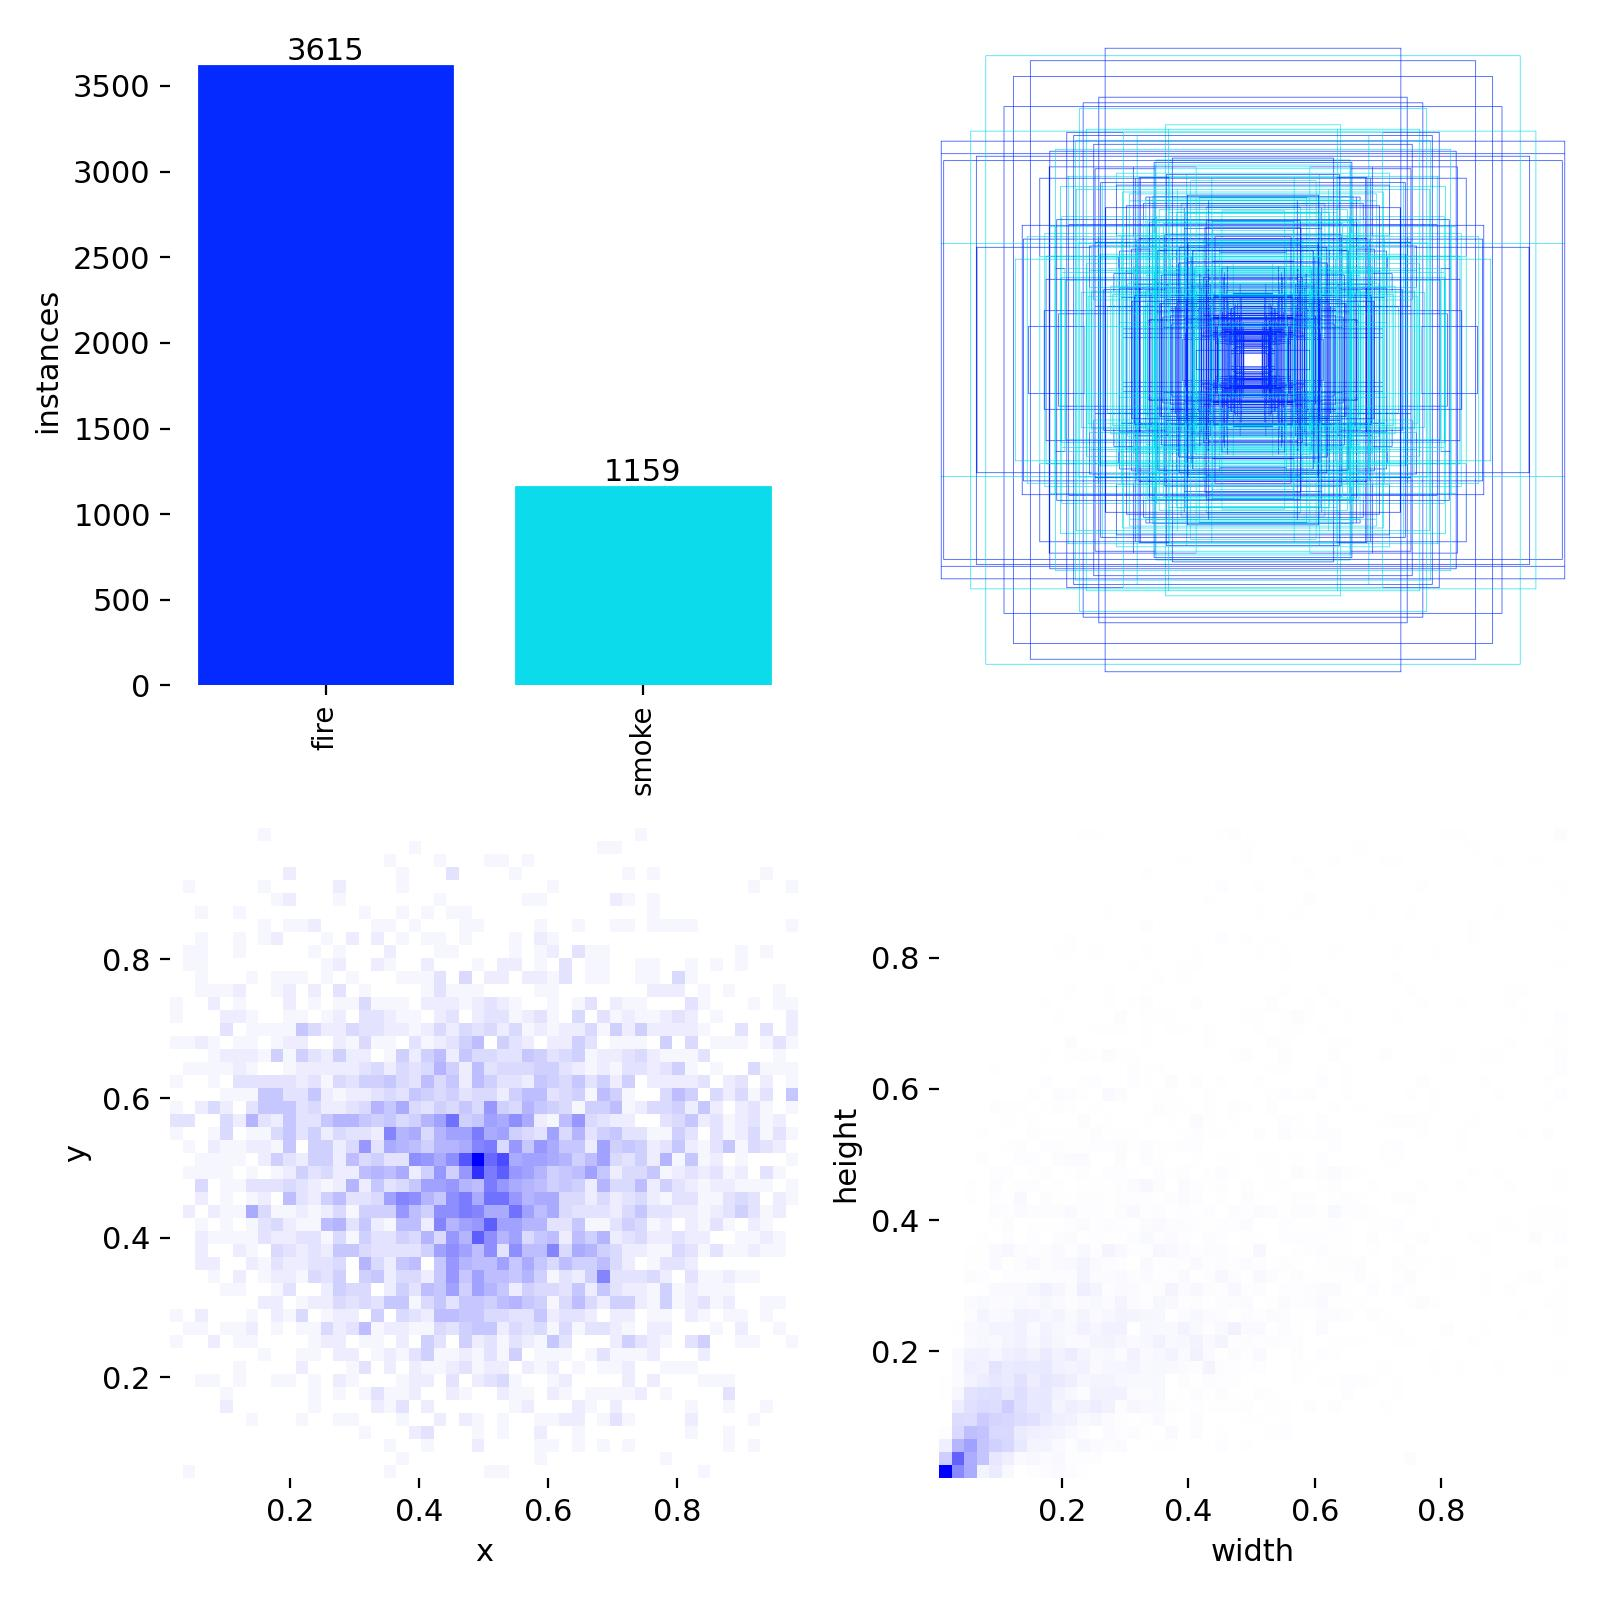

In [ ]:
Image(filename='runs/detect/train/labels.jpg', width=600)

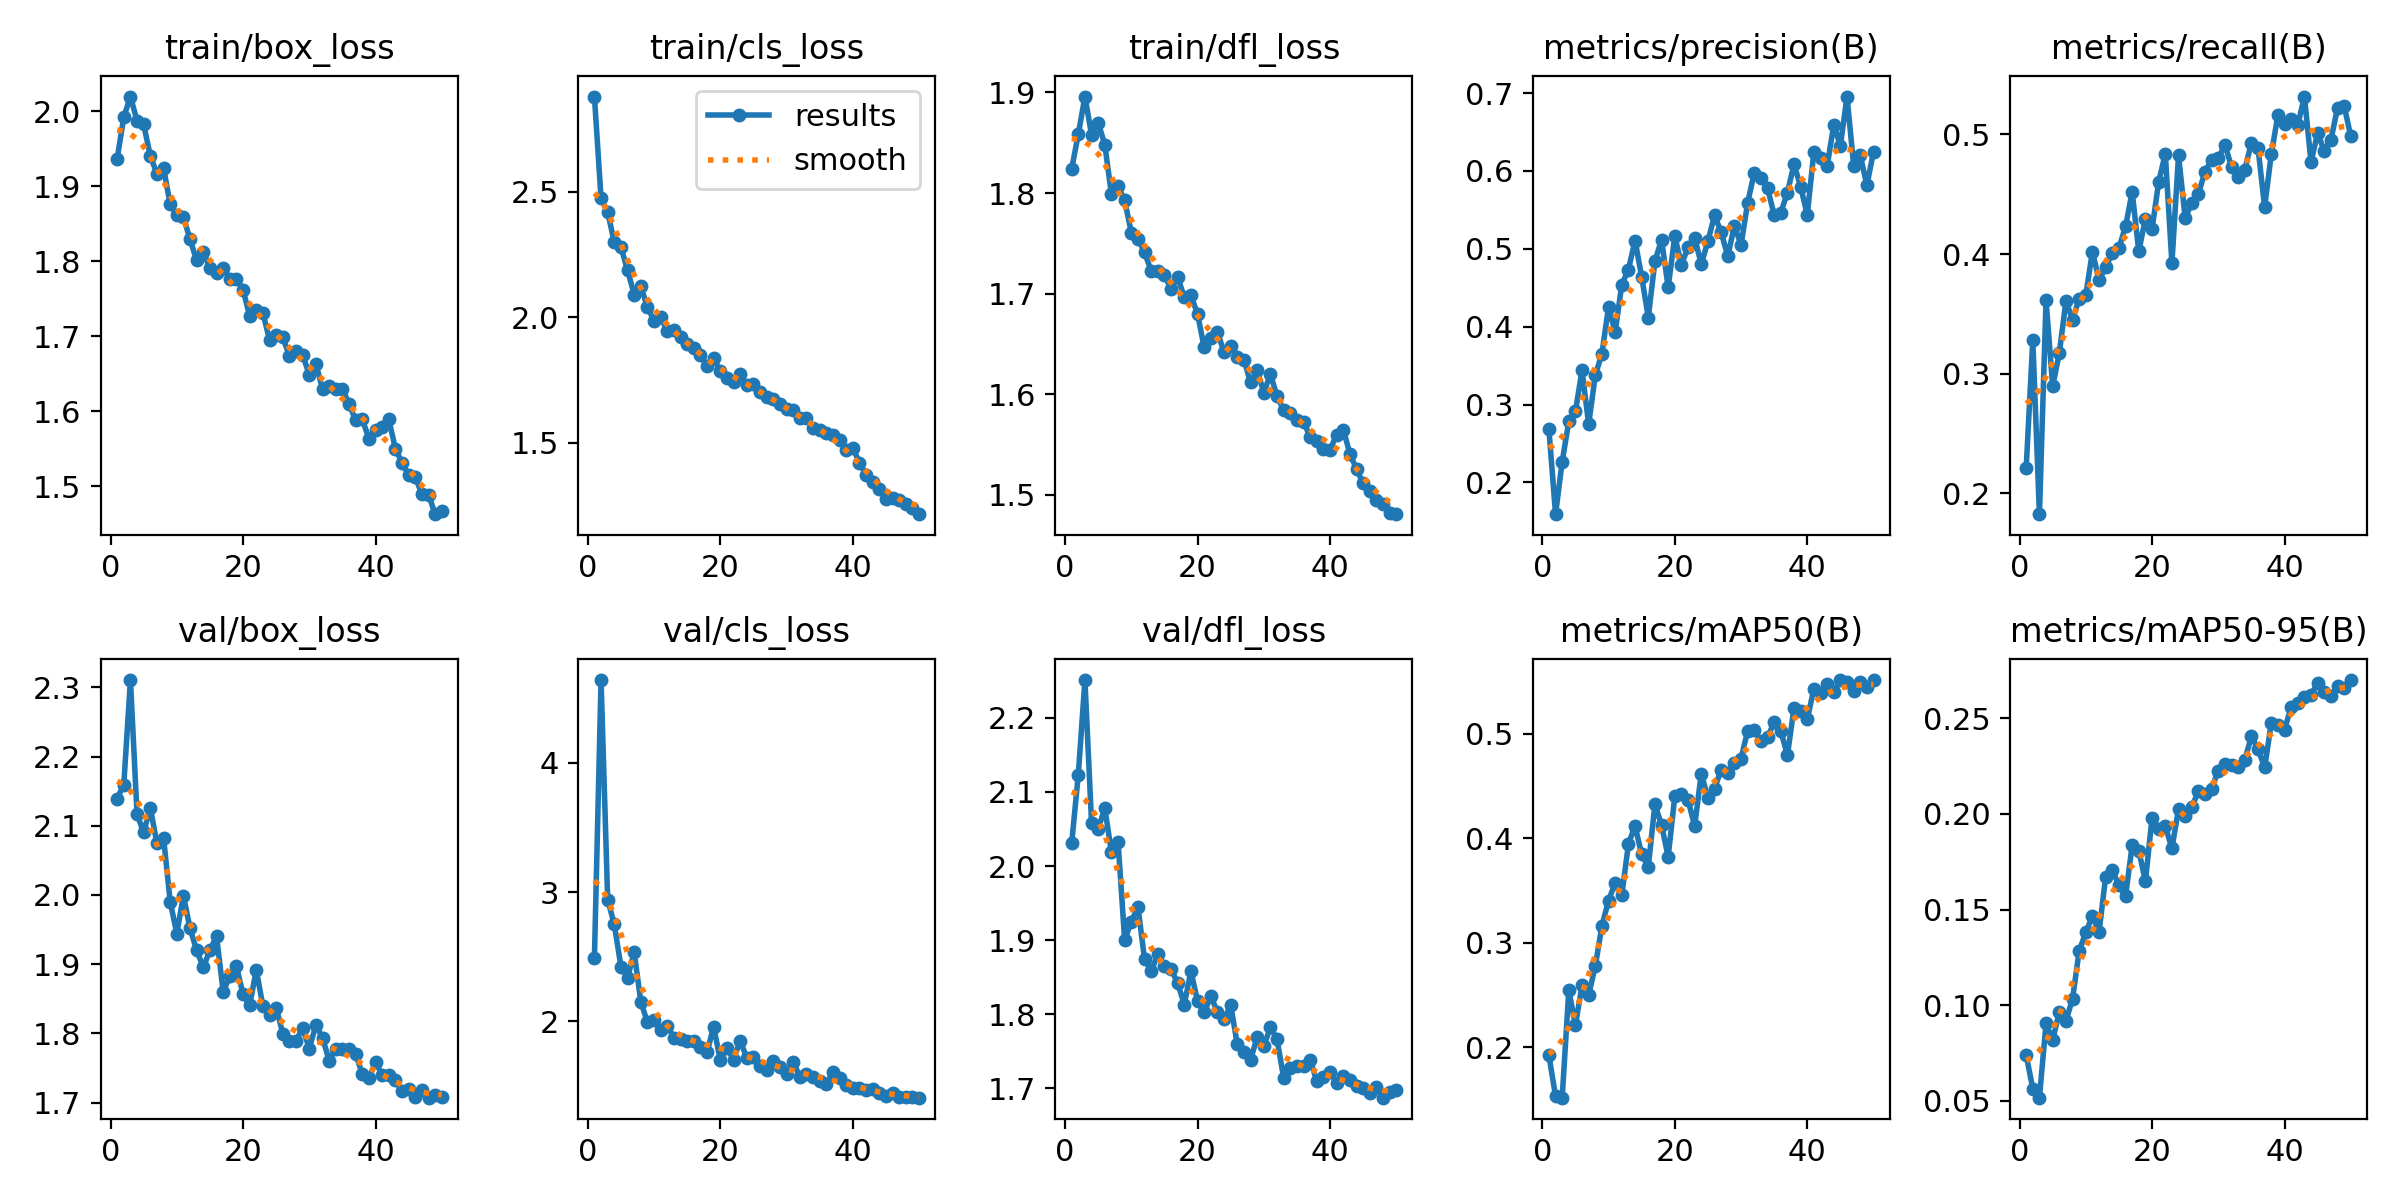

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

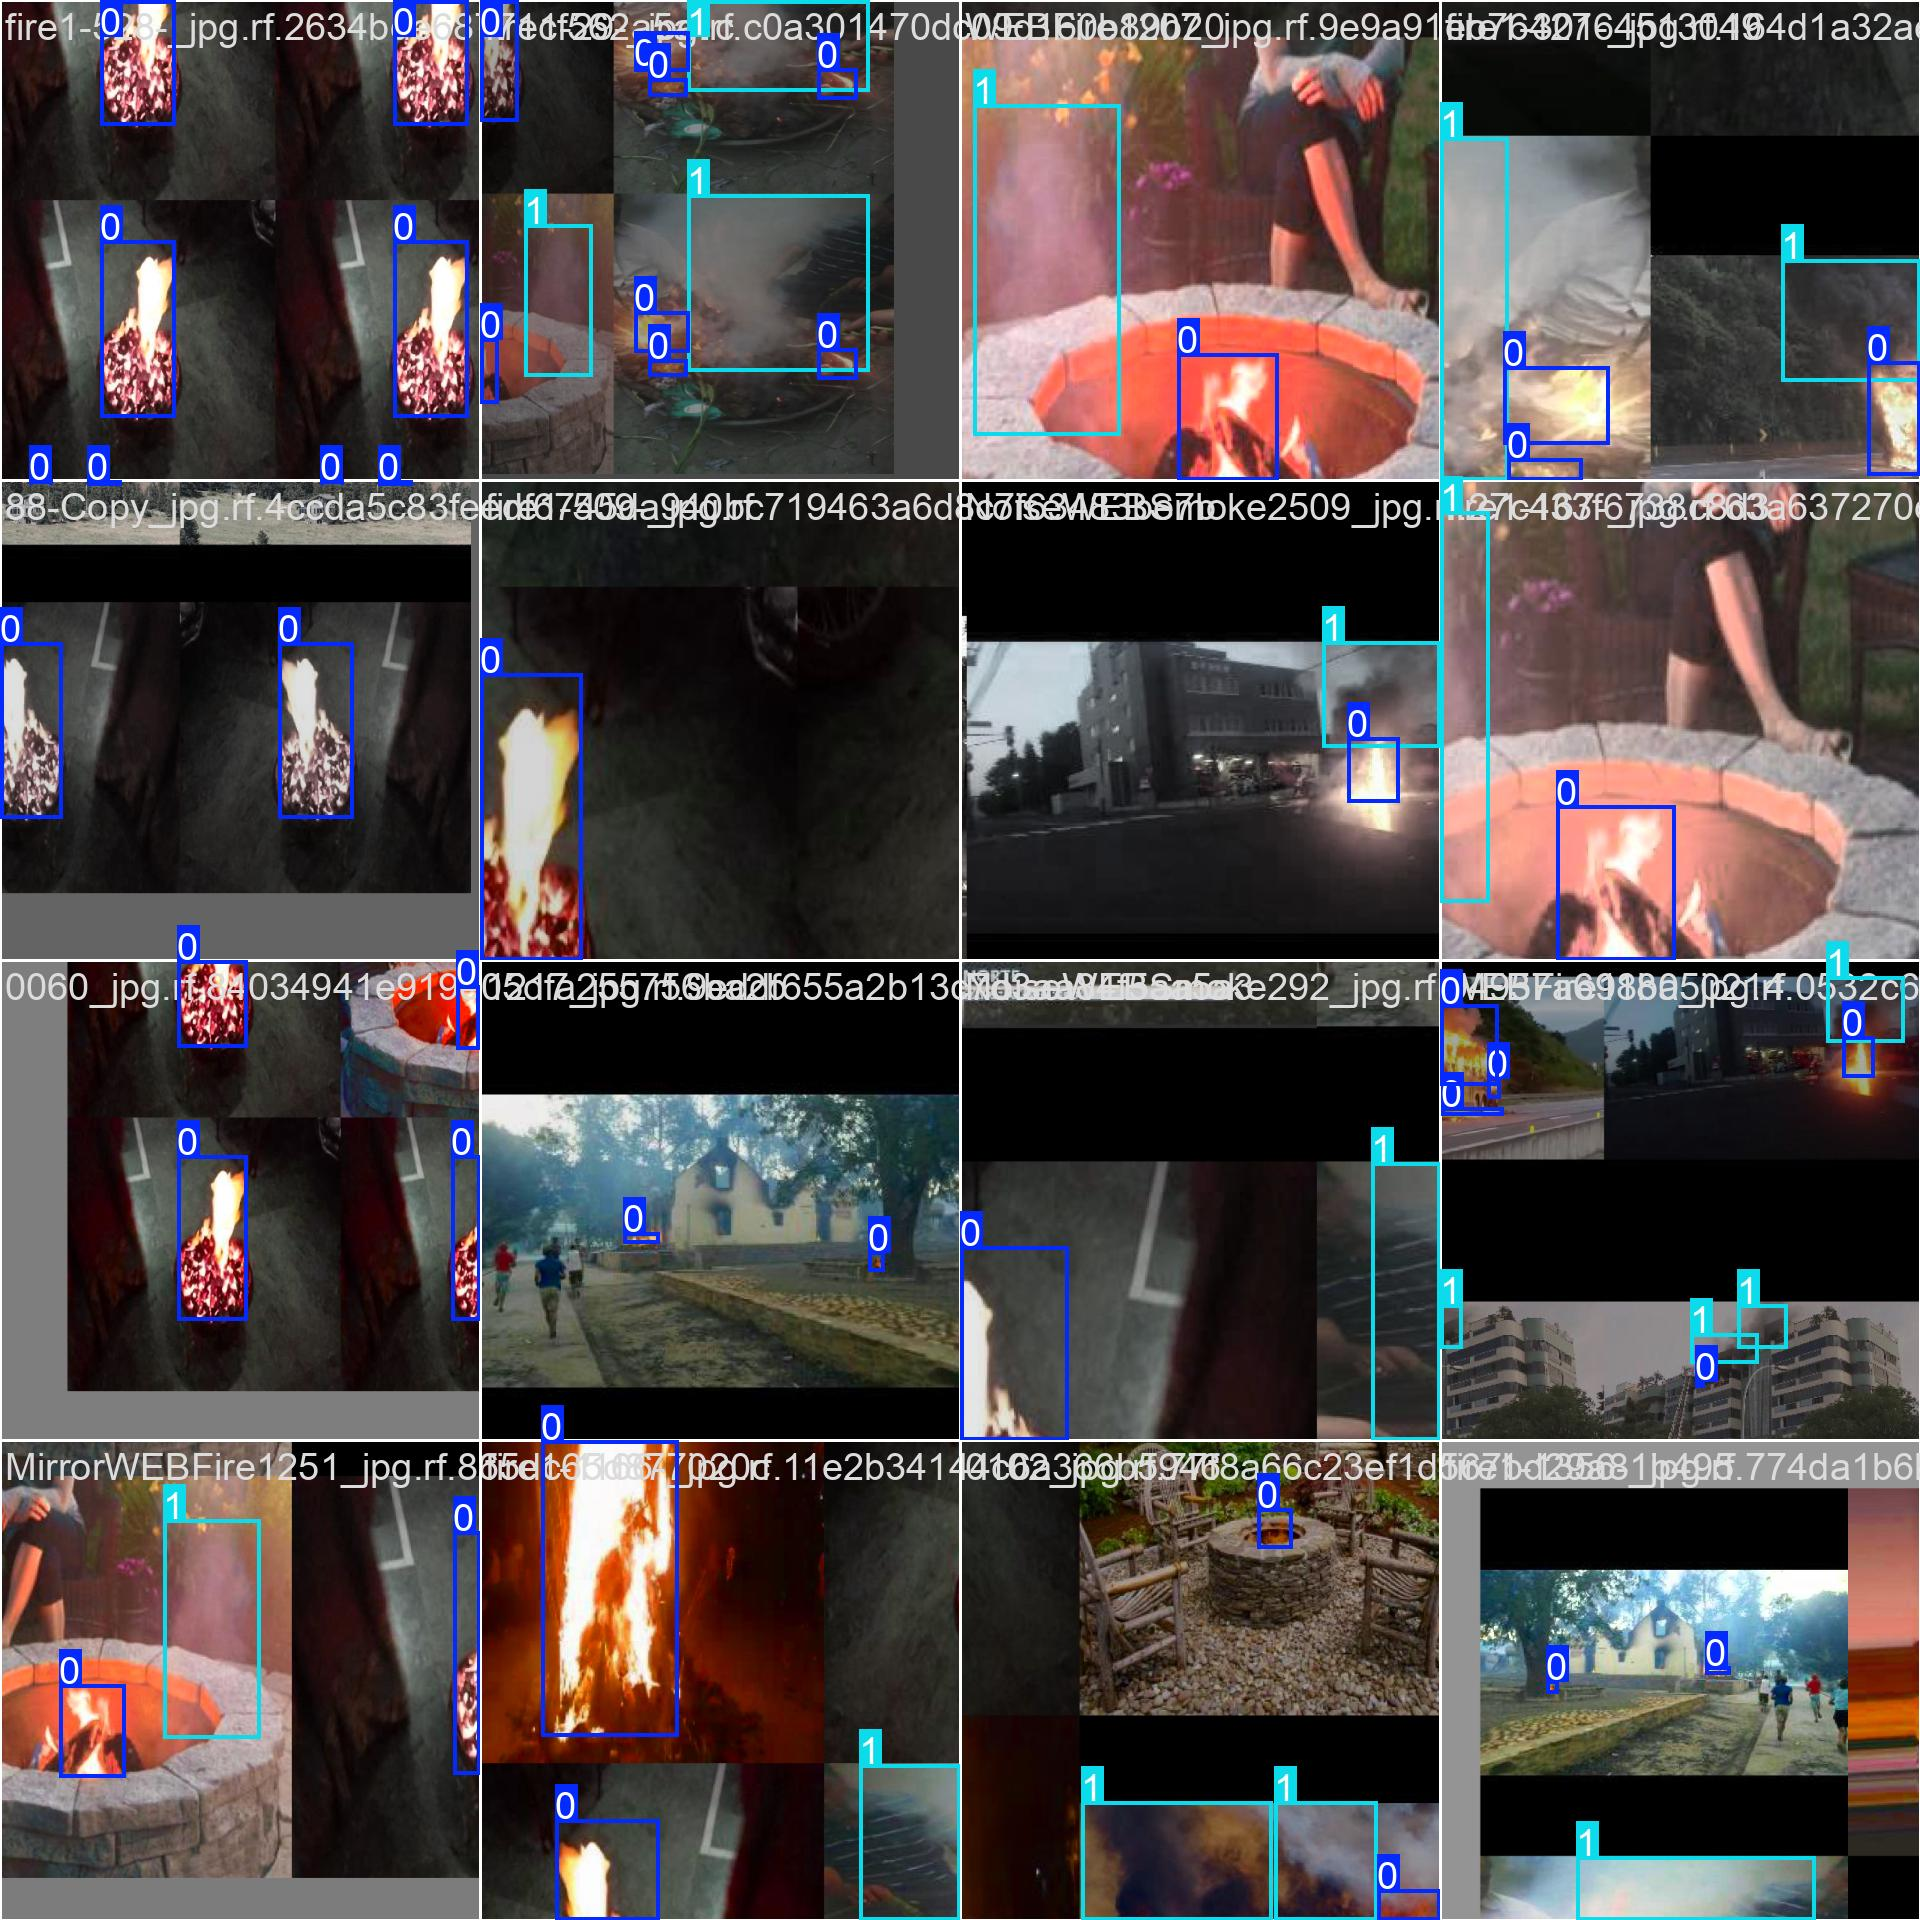

In [ ]:
Image(filename='runs/detect/train/train_batch0.jpg', width=600)

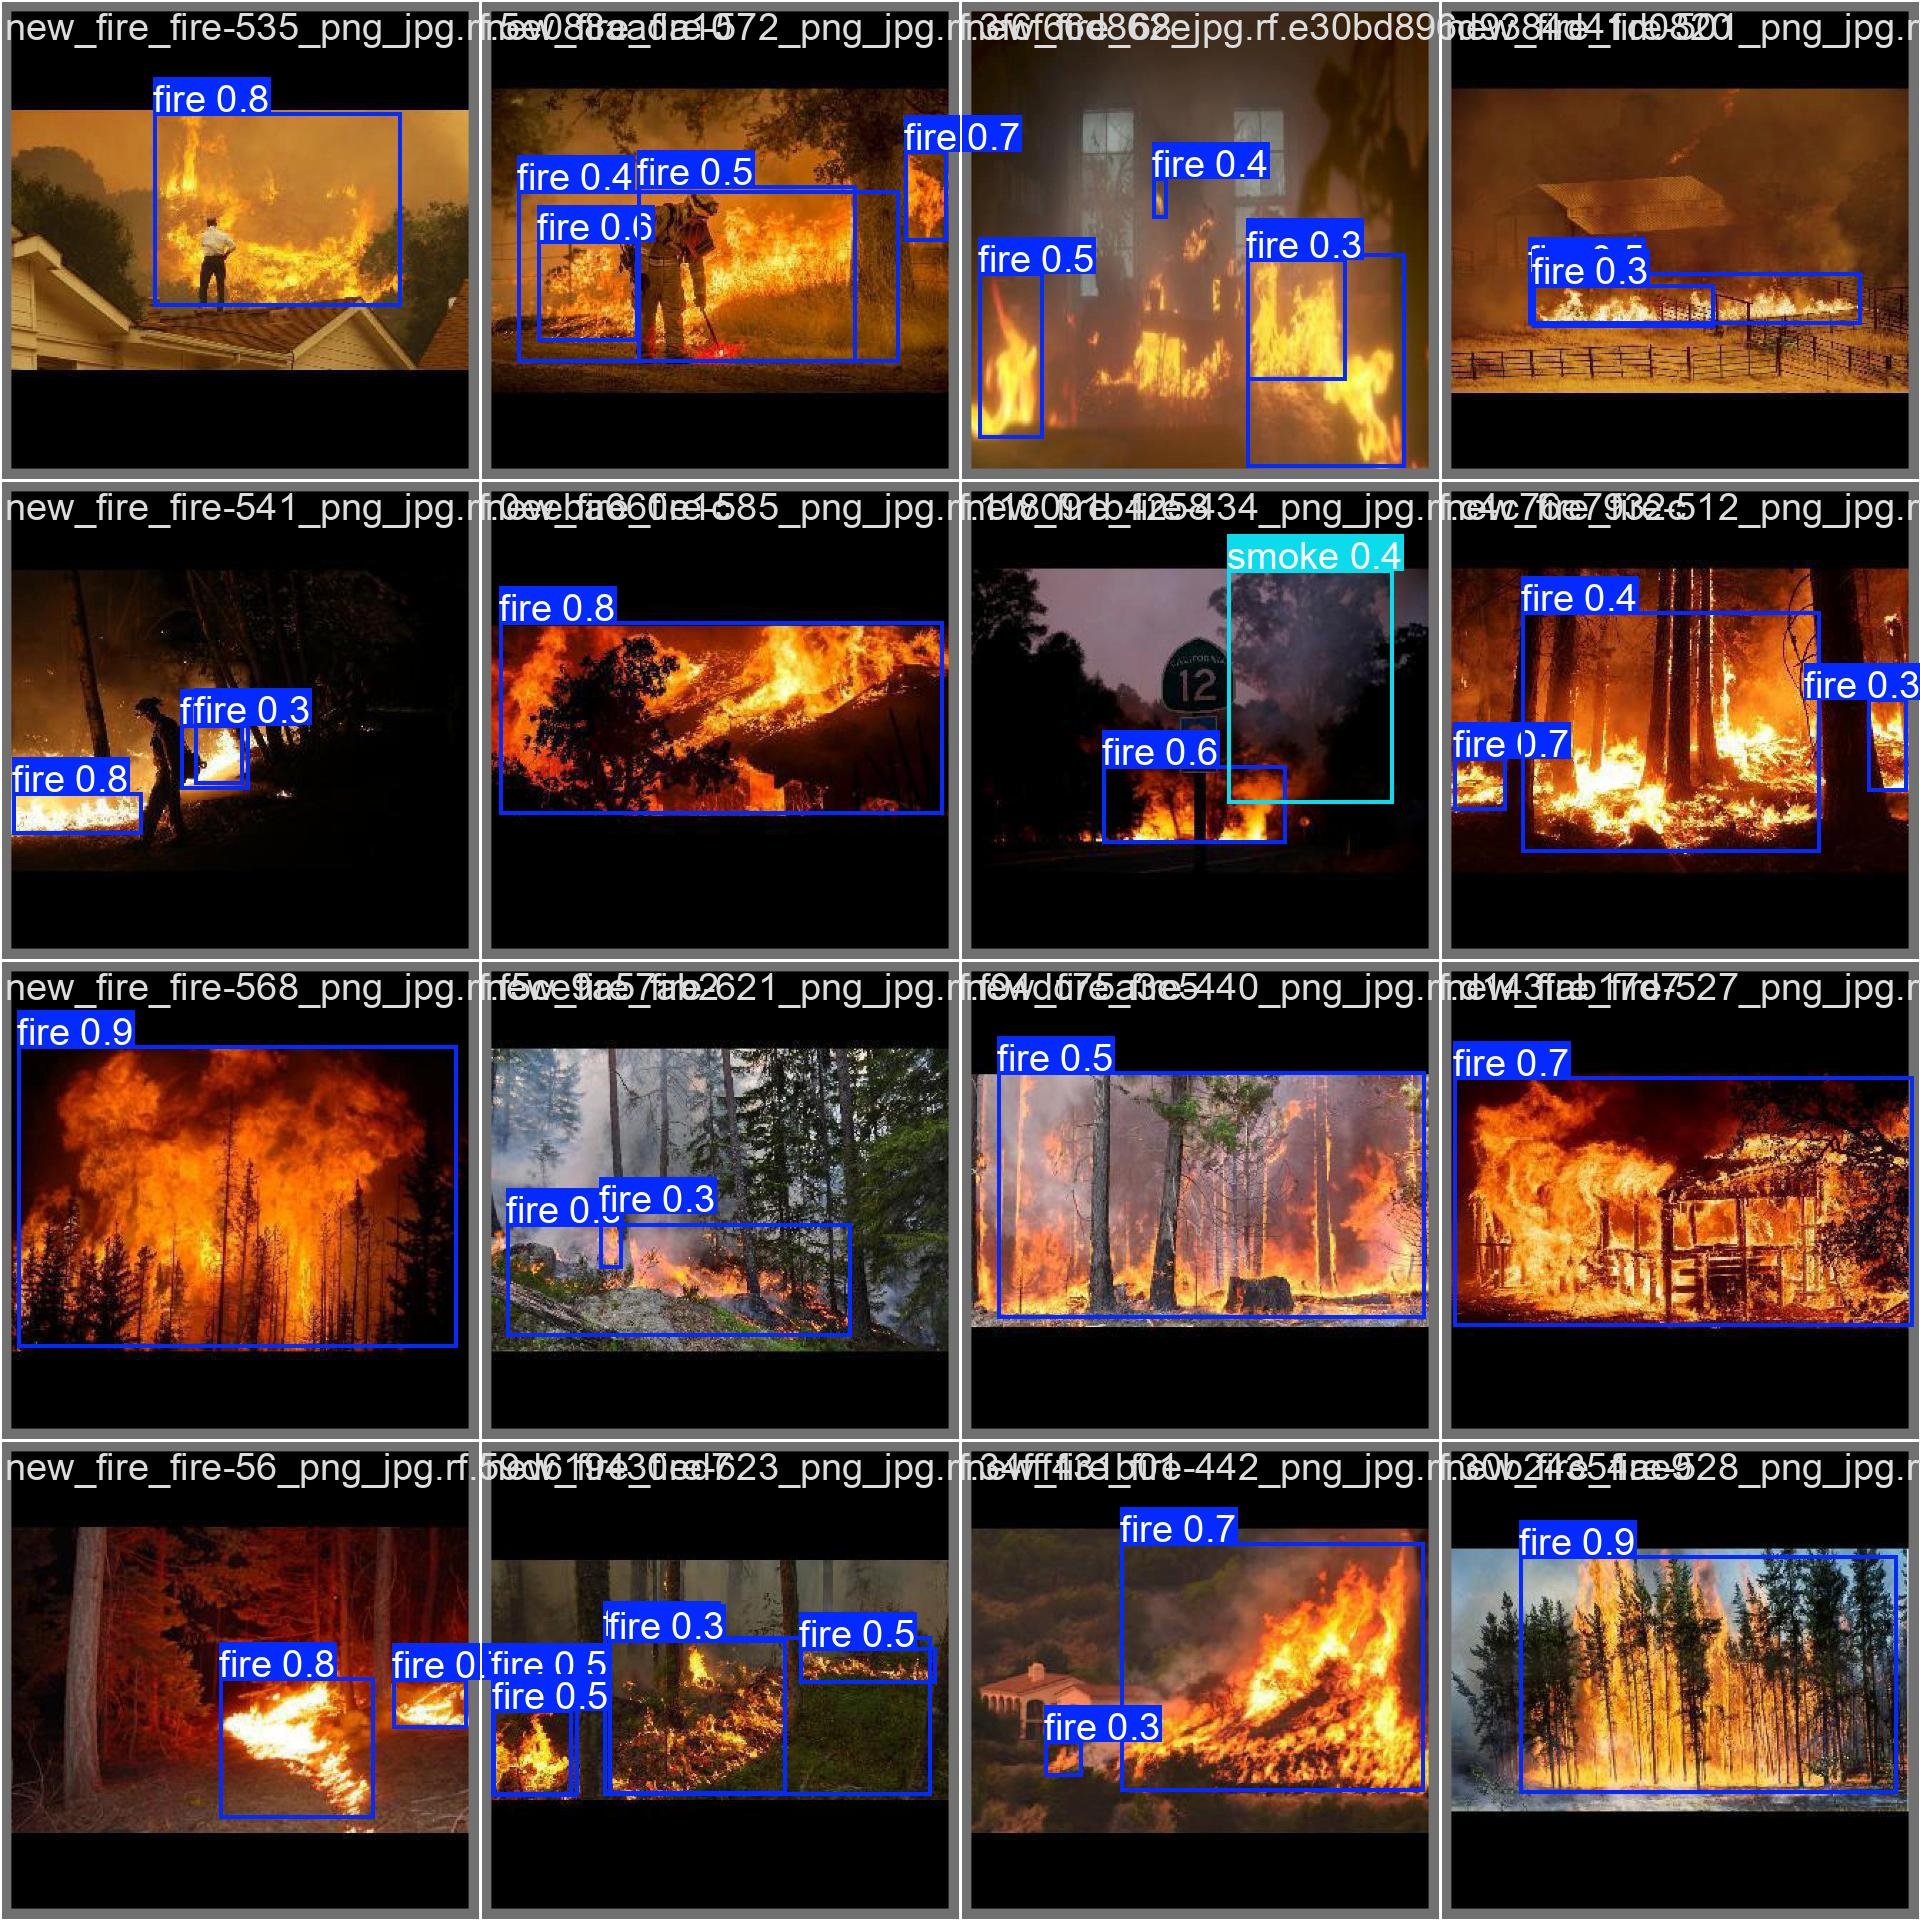

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1806.0±561.3 MB/s, size: 43.6 KB)
val: Scanning /content/fire-2/valid/labels.cache... 363 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 363/363 5.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 4.6it/s 5.0s
                   all        363        896      0.624      0.499       0.55      0.269
                  fire        358        673      0.689      0.609      0.656      0.337
                 smoke        147        223      0.558       0.39      0.443      0.201
Speed: 1.2ms preprocess, 4.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/385 /content/fire-2/test/images/0072_JPG_jpg.rf.da8c601b3a5859e53ce5897d1c604bf8.jpg: 640x640 1 fire, 1 smoke, 8.5ms
image 2/385 /content/fire-2/test/images/0075_JPG_jpg.rf.5a530c3c6f1b639d1529a713ce898dff.jpg: 640x640 1 fire, 9.4ms
image 3/385 /content/fire-2/test/images/0097_jpg.rf.fa3ea8a21e9f69c937e9235c6f8d89d6.jpg: 640x640 3 fires, 7.4ms
image 4/385 /content/fire-2/test/images/0102_jpg.rf.4d09c34e7d031654eccc66288e796872.jpg: 640x640 1 fire, 14.1ms
image 5/385 /content/fire-2/test/images/0104_jpg.rf.8d5b2388ceba1673709750f43e921843.jpg: 640x640 3 fires, 9.6ms
image 6/385 /content/fire-2/test/images/0105_jpg.rf.e17e40697b4dc6cfe13d2f23f927441c.jpg: 640x640 1 fire, 1 smoke, 10.9ms
image 7/385 /content/fire-2/test/images/0106_jpg.rf.61ad0b38d7f4d509b91c709a6f08047f.jpg: 640x640 (no detections), 9.6ms
image 8/385 /

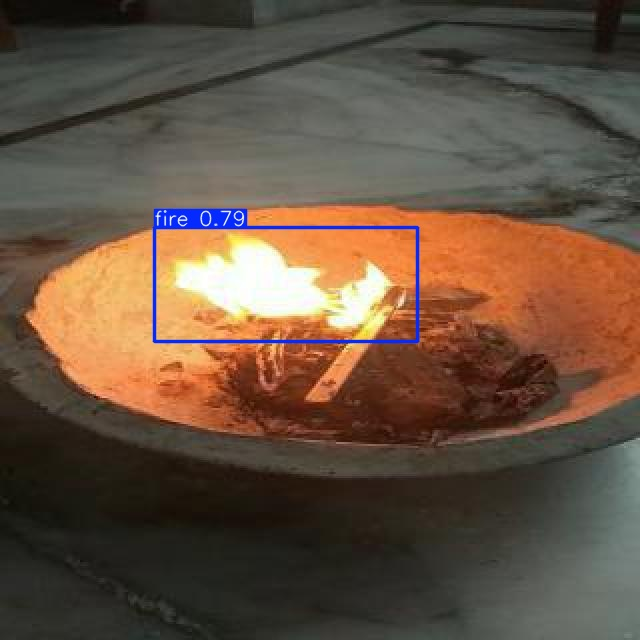

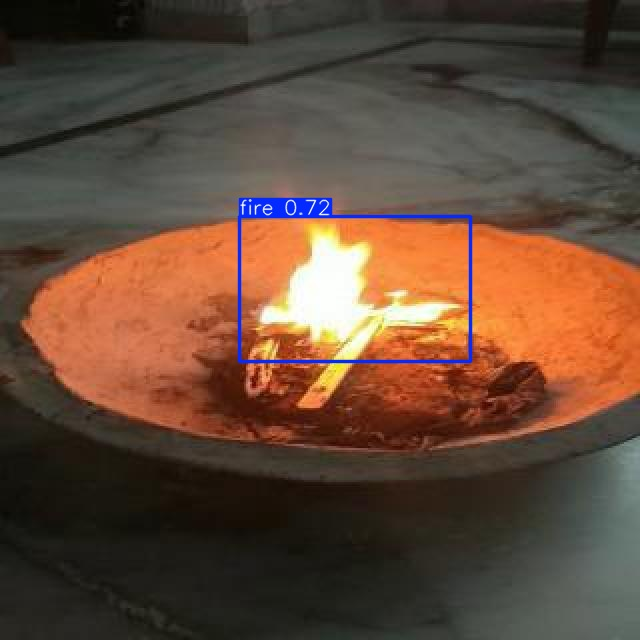

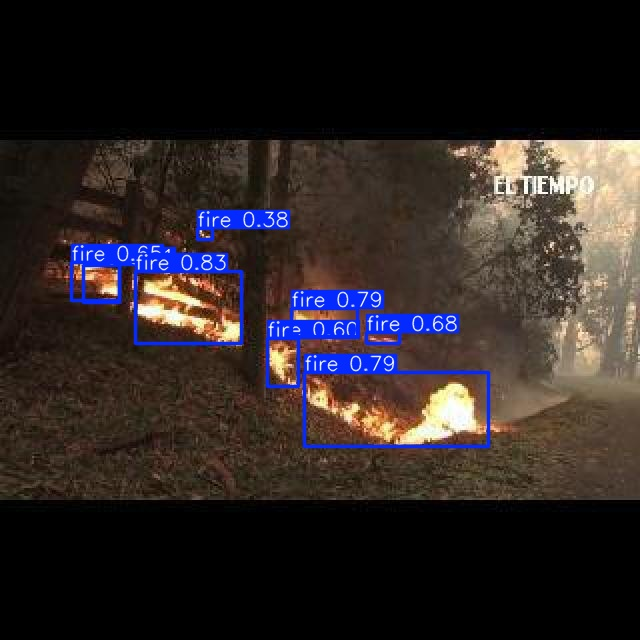

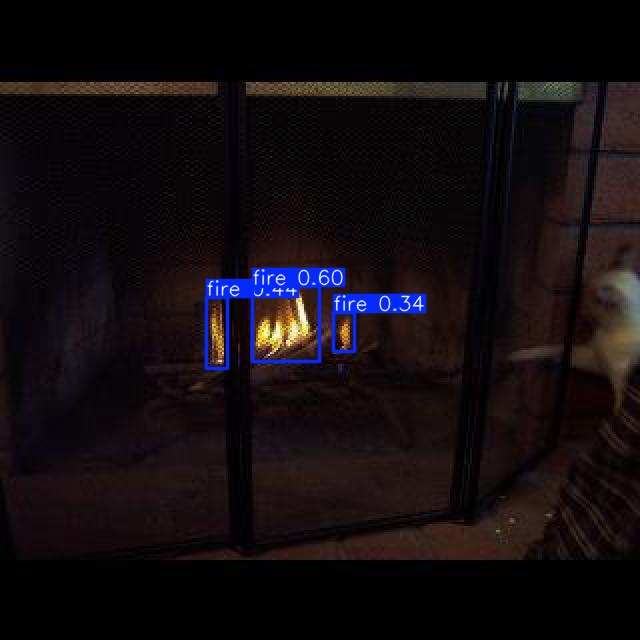

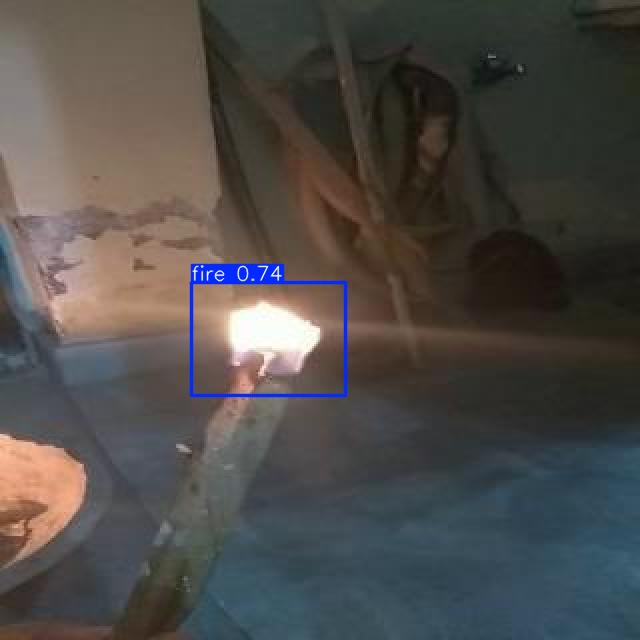

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Find the latest prediction folder (predict, predict2, ...)
latest_folder = max(glob.glob('/content/runs/detect/predict*'), key=os.path.getmtime)

# Display first 5 predicted images
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")


image 1/1 /content/forest fire.jpeg: 416x640 5 fires, 1 smoke, 48.6ms
Speed: 3.0ms preprocess, 48.6ms inference, 124.7ms postprocess per image at shape (1, 3, 416, 640)


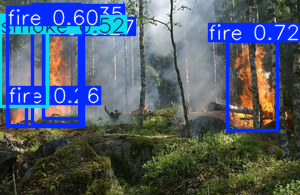

In [ ]:
from ultralytics import YOLO

# Load your best.pt model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run inference
results = model("/content/forest fire.jpeg", conf=0.25)

# Access the first (and only) result
results[0].show()  # display bounding boxes